In [1]:
%load_ext jupyter_black

# SciPy - Scientific Python

https://www.scipy.org/

SciPy предназначена для выполнения научных и инженерных расчётов.

Согласно wiki, основные модули:


| подмодуль     | функциональность                                                 |
|---------------|------------------------------------------------------------------|
|.cluster       | Кластеризация                                                    |
|.constants     | Некоторые популярные математические и физические константы       |
|.datasets      | Маленькие датасеты для демонстраций                              |
|.fft           | Дискретное преобразование фурье и ко                             |
|.integrate     | Численное нахождение значения интегралов, решение диффуров       |
|.interpolate   | ИНтерполяция многочленов, сплайны                                |
| scipy.io      | Ввод-вывод данных, в том числе в проприетарных форматах          |
|.linalg        | Линейная алгебра: решение слу, декомпозиции, ...                 |
|.ndimage       | Image Signal Processing & Analysis                               |
|.odr           | Метод для error-in-variables моделей                             |
|.optimize      | Всевозможные оптимизаторы                                        |
|.signal        | Свертки, B-сплайны, фильтры, спектральный анализ; то что не вошло в ndimage |
|.sparse        | Разреженные матрицы                                              |
|.spatial       | Алгоритмы в метрчиеских пространствах                            |
|.special       | Всевозможные особые функции: гаммы, беты, ...      |
|.stats         | Распределения, статистики, статистические тесты, ...             |

In [2]:
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

sp.__version__

'1.11.3'

### scipy.special

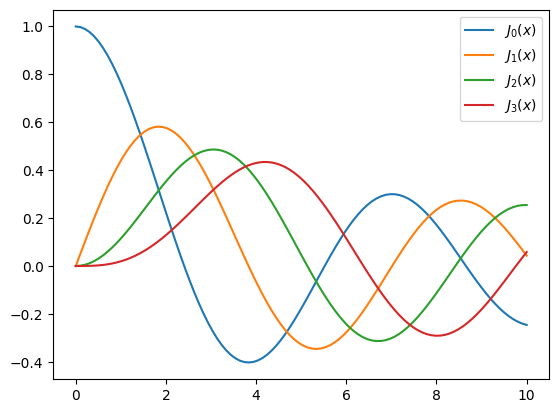

In [3]:
from scipy.special import jn, yn, jn_zeros, yn_zeros

n = 0
x = 0.0
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend();

### scipy.integration

In [5]:
from scipy.integrate import quad

a = 3
b = 7

quad(lambda x: x**2, a, b)

(105.33333333333333, 1.1694349192718314e-12)

In [6]:
b**3 / 3 - a**3 / 3

105.33333333333333

### scipy.linalg

In [7]:
from scipy.linalg import solve, inv, det

In [8]:
A = np.array([[2, 2, 3], [4, 6, 6], [7, 8, 10]])
b = np.array([10, 11, 12])

# решение СЛУ
x = solve(A, b)

((A @ x - b) ** 2).sum()

4.0389678347315804e-27

In [9]:
inv(A) @ A

array([[1.00000000e+00, 0.00000000e+00, 2.66453526e-15],
       [0.00000000e+00, 1.00000000e+00, 2.22044605e-16],
       [2.22044605e-15, 1.77635684e-15, 1.00000000e+00]])

In [10]:
A

array([[ 2,  2,  3],
       [ 4,  6,  6],
       [ 7,  8, 10]])

In [12]:
det(A)

# посчитает определитель матрицы 3 на 3? :)
d = (
    A[0, 0] * A[1, 1] * A[2, 2]
    + A[0, 1] * A[1, 2] * A[2, 0]
    + A[1, 0] * A[2, 1] * A[0, 2]
    - A[0, 2] * A[1, 1] * A[2, 0]
    - A[0, 0] * A[1, 2] * A[2, 1]
    - A[0, 1] * A[1, 0] * A[2, 2]
)
d - det(A)

3.552713678800501e-15

#### scipy.sparse: разреженные матрицы
RTFM: https://docs.scipy.org/doc/scipy/reference/sparse.html

Cейчас этот раздел переезжает с собственного формата matrix в numpy-совместимый array, будьте внимательны

### Описание видов матриц (на самом деле любой-в-любой переводится за линейное время):


**coo_matrix** 

Данные хранятся в **COO**rdinate format, то есть как тройки (x, y, value). Не поддерживаются арифметические операции и выделение подматриц, колонок и строк. **Если встречаются тройки с одинаковыми координатами, значения суммируются.**

Хорош для построения матриц или как промежуточный формат между другими способами представления разреженных матриц (csc, csr).

---
**csc_matrix**


Элементы хранятся по колонкам. Следовательно, главная фишка -- эффективное выделение колонок (слайсинг).

Кроме того, эффективными будут операции CSC + CSC, CSC * CSC, etc. и умножение на строку.

Взамен, дороги слайсы по строкам и модификация нулевых элементов.

---
**csr_matrix**

Элементы хранятся по строкам. Следовательно, главная фишка -- их эффективное выделение (слайсинг).

Кроме того, эффективно реализованы операции CSR + CSR, CSR * CSR и т. д. Быстрое умножение на столбец.

Дороги выделение столбцов и модификация нулевых элементов.

---
**bsr_matrix**

Этот класс подойдёт для разреженных матриц, в которых ненулевые элементы встречаются плотными блоками, например матрицы в жордановой форме.  Можно указать высоту и ширину блоков; по умолчанию эти параметры подбираются эвристически. В остальнгом устрен как CSR.

---

**dia_matrix**

Диагонали хранятся как строки матрицы, которую подаём конструктору. Также подаётся массив со "сдвигами" от главной диагонали. 
 
Насколько я понимаю, хорош для хранения матриц, у которых много пустых диагоналей **(?)**.
```python
>>> data = np.array([[1, 2, 3, 4]]).repeat(3, axis=0)

>>> offsets = np.array([0, -1, 2])

>>> dia_matrix((data, offsets), shape=(4, 4)).toarray()
array([[1, 0, 3, 0],
       [1, 2, 0, 4],
       [0, 2, 3, 0],
       [0, 0, 3, 4]])
```
---
**dok_matrix**

Словарь, в котором ключ -- пара координат. Быстрый доступ до элементов, быстрое преобразование в COO (скан по всем ключам). Дубликатов не бывает.

Всё остальное -- медленное.

---
**lil_matrix**

Цепной список цепных списков, представляющих строки матрицы. Эффективный слайсинг строк, эффективное добавление новых элементов (=модификация нулевых значений).

Арифметика -- медленная, умножение на вектор -- медленное, слайсинг колонок -- медленный.

Хорош для построения. Если матрица ну совсем большая, то лучше использовать COO.

# Ещё

Работают многие методы, уже знакомые нам по занятию и домашке по NumPy.
Например, hstack, vstack, ...

Возможно, этот модуль вам пригодится в домашней работе.

In [19]:
from scipy.sparse import csr_matrix, csc_matrix, coo_matrix

In [20]:
M = sp.sparse.random(10000, 10000, density=0.01, format="coo", dtype=float)

In [15]:
print("The size of M is", M.data.nbytes // 1024, "Kb")

The size of M is 7812 Kb


In [ ]:
# а numpy array такого размера бы сколько весил?
# ~4 Gb

In [21]:
csc_M = csc_matrix(M)
csc_M

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Column format>

In [22]:
type(csc_M), type(csc_M.T)

(scipy.sparse._csc.csc_matrix, scipy.sparse._csr.csr_matrix)

А что будет, если транспонировать?

In [23]:
%timeit coo_M = coo_matrix(M)

793 µs ± 67.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [24]:
coo_M = coo_matrix(M)
%timeit coo_M.T
%timeit csc_M.T

776 µs ± 24.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
36.6 µs ± 358 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [25]:
csc_Mt = csc_matrix(M.T)
csc_Mt

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Column format>

In [26]:
csr_M = csr_matrix(csc_M)
csr_M

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

In [27]:
%timeit csr_M.dot(csc_Mt)

2.22 s ± 7.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%timeit M.dot(csc_Mt)

2.28 s ± 7.02 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Почему?**

В исходном коде, когда мы умножаем на разреженную матрицу, вызывается вот такой код:

```python
def _matmul_sparse(self, other):
    return self.tocsr()._matmul_sparse(other)
```


In [29]:
from numpy.random import randint

print("Extracting columns:")
%timeit x = [csc_M[:, i] for i in randint(0, csc_M.shape[0], 100)]
%timeit x = [csr_M[:, i] for i in randint(0, csc_M.shape[0], 100)] # longer?

print("\nExtracting rows:")
%timeit x = [csc_M[i, :] for i in randint(0, csc_M.shape[0], 100)] # longer?
%timeit x = [csr_M[i, :] for i in randint(0, csc_M.shape[0], 100)]

Extracting columns:
7.78 ms ± 293 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
173 ms ± 5.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Extracting rows:
202 ms ± 11.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
8.63 ms ± 362 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### scipy.optimize

In [ ]:
def f(x):
    return 4 * x**3 + (x - 2) ** 2 + x**4 - 25


fig, ax = plt.subplots()
x = np.linspace(-5, 3, 100)
ax.plot(x, f(x))

In [ ]:
x_min = sp.optimize.fmin_bfgs(f, -2)
x_min

In [ ]:
x_min = optimize.fmin_bfgs(f, 3)
x_min

In [ ]:
root = optimize.root(f, -100)  # -100, -3, 100
root

### scipy.stats

In [ ]:
X = sp.stats.poisson(3.5)
n = np.arange(0, 15)

fig, axes = plt.subplots(3, 1, sharex=True)
# plot the probability mass function (PMF)
axes[0].step(n, X.pmf(n))
# plot the cumulative distribution function (CDF)
axes[1].step(n, X.cdf(n))
# plot histogram of 1000 random realizations of the stochastic variable X
axes[2].hist(X.rvs(size=1000));

In [ ]:
# std, var - в чем разница?
X.mean(), X.std(), X.var()  # Poisson distribution

In [ ]:
# create a (continuous) random variable with normal distribution
Y = sp.stats.norm()
x = np.linspace(-5, 5, 100)
fig, axes = plt.subplots(3, 1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))
# plot the cumulative distribution function (CDF)
axes[1].plot(x, Y.cdf(x))
# plot histogram of 1000 random realizations of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=20);

In [ ]:
Y.mean(), Y.std(), Y.var()  # normal distribution

На занятиях мы с вами не раз будем вручную (без использования готовых библиотек) реализовывать разные модели машинного обучения. ОЧЕНЬ частая ситация - надо узнать плотность многомерного нормального распроеделения в точке. Кстати чем такое распределение параметризуется? Чему она равна его плотность?

In [ ]:
mu = np.array([1, 2, 3])
x = np.array([2, 3, 4])
Sigma = np.array(np.eye(3) + np.random.rand(3, 3) * 0.01)

In [ ]:
Z = sp.stats.multivariate_normal(mu, Sigma)
Z.pdf(x)

In [ ]:
# формулу плотности нормального распределения тоже надо помнить
pdf = ...

---
###  Брахистохрона
Задача о нахождении кривой наискорейшего спуска, или *брахистохроны*, состоит в том, чтобы найти такую форму горки, чтобы время скатывания  по ней тела без трения было минимальным. 

![SegmentLocal](https://upload.wikimedia.org/wikipedia/commons/6/63/Brachistochrone.gif)

Известно, что решение этой задачи - трансцедентная кривая, называемая [циклоидой](https://ru.wikipedia.org/wiki/%D0%A6%D0%B8%D0%BA%D0%BB%D0%BE%D0%B8%D0%B4%D0%B0). Кроме того, что это кривая минимизирует время спуска, она является траекторией точки на границе катящейся окружности, время спуска по этой кривой не зависит от начального положения, а еще маятник в часах имеет циклоидальный ограничитель, благодаря чему частота его колебаний не зависит от амплитуды.

Она была поставлена Иоганном Бернулли в 1696 году. Разные решения предлагали Исаак Ньютон, Якоб Бернулли, Г. В. Лейбниц, Г. Ф. Лопиталь, Э. В. Чирнхаус. Скорее всего, вы уже находили ее на курсе по вариационному исчислению, минимизируя значение какого-то там интеграла. Здесь же предлагается приблизить брахстохрону при помощи функционала scipy.optimize.

Самый простой способ построить брахистохрону - параметризовать ее (вывод формул из закона сохранения энергии можно найти [тут](https://en.wikipedia.org/wiki/Brachistochrone_curve#Indirect_method)
$$x = r \theta - r\sin \theta $$
$$y = r - r\cos  \theta$$

Т.е. мы хотим найти такие $\theta$ и $r$, что соответсвущая дуга циклоиды соединяет концы нашей горки.

**Как будем решать такую задачу?**

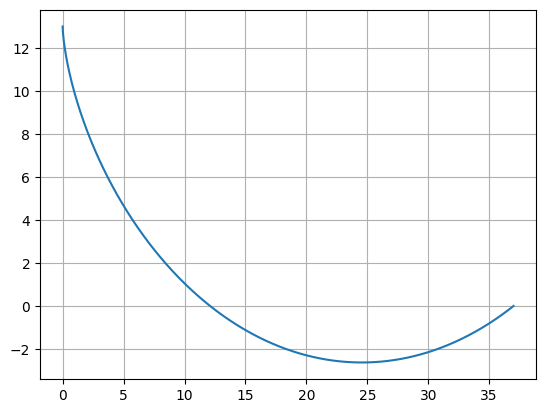

In [33]:
from scipy import optimize

HEIGHT = 13
WIDTH = 37

# отрисуем правильный ответ:
fig = plt.figure()
ax = fig.add_subplot(111)

# Находим \theta и r
cycl = lambda theta: (1 - np.cos(theta)) / (theta - np.sin(theta)) - HEIGHT / WIDTH

theta = sp.optimize.root(cycl, 0.001).x[0]
r = HEIGHT / (1 - np.cos(theta))

ts = np.linspace(0, theta, 1000)
sol_xs = r * (ts - np.sin(ts))
sol_ys = HEIGHT - r * (1 - np.cos(ts))

ax.plot(sol_xs, sol_ys)
ax.grid()
fig.canvas.draw()
plt.show(block=False)

### Задача 3: Брахистохрона (1 балл)

В классе мы находили брахистохрону через параметризацию соответсвубщей дуги циклоиды. Ключевым здесь было то, что мы заранее знали, в каком виде искать ответ, что, к сожалению, далеко не всегда случается в реальной жизни. В этой задаче вам нужно будет построить кусочно-линейное приближение брахистохроны, не пользуясь явными формулами для ее формы. Другими словами, напишите функционал, который под данным высотам точек вычисляет время спуска, -- и минимизируйте этот функционал средствами scipy.

In [34]:
# NB. Паметры горки и правильный ответ находятся выше - вы можете поменять их на свое усмотрение.
NUM_POINTS = 50
dx = WIDTH / (NUM_POINTS - 1)
xs = np.linspace(0, WIDTH, NUM_POINTS)

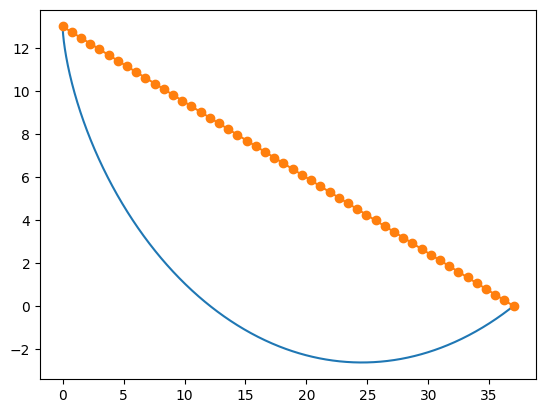

In [35]:
def draw(ys):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(sol_xs, sol_ys)
    (li,) = ax.plot(xs, ys, marker="o")


# инициализируем горку прямой
ys = np.linspace(HEIGHT, 0, NUM_POINTS)
draw(ys)

In [ ]:
def get_time(ys):
    """
    :param ys: heigths of our points
    :return: total time
    """
    dh = lambda y: np.abs(y - sol_ys)
    return 


get_time(ys)

In [ ]:
# Bounds: we can not move the first and the last points
bounds = (
    [(HEIGHT, HEIGHT)]
    + [(-float("inf"), float("inf")) for _ in range(NUM_POINTS - 2)]
    + [(0, 0)]
)

# Run the optimization
...
draw(result.x)

In [ ]:
get_time(ys), get_time(result.x)

---

This notebook is basen on Anton Alekseev's practical lessons at MCS SPBU and [this](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-3-Scipy.ipynb)